In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#fname="2015-08-27_FlipFlop1.txt"
fname="chaotic_3ring.txt"
f1=file(fname)

filetext=f1.readlines()

data=[]
for i in range(12,len(filetext)):
    data.append(map(float, filetext[i].split()))
import pylab as py

d1=py.transpose(data)

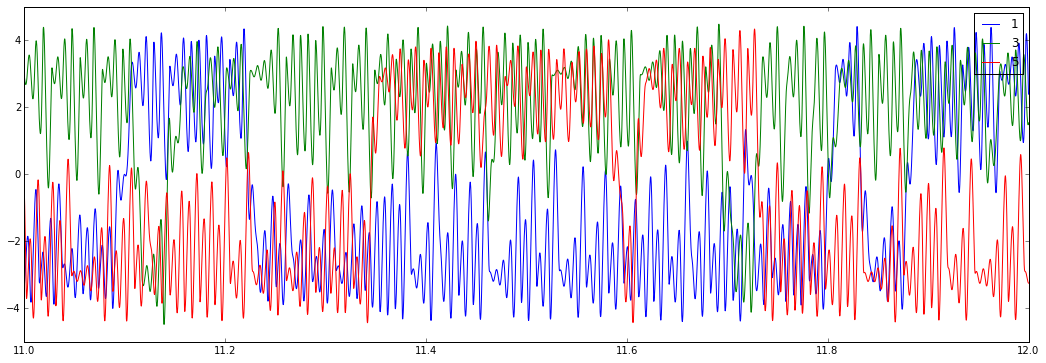

In [79]:
ts=10000.0 #points/second
stt=1.6
end=2.0
stt=11.0
end=12.0

fig1=py.figure(figsize=(18,6))
ax1=fig1.add_subplot(111)
d2=d1[:,stt*ts:end*ts]
for i in range(3):
    chan=2*i+1
    ax1.plot(d2[0], d2[chan], "-", label=chan)
ax1.legend()
py.savefig("orig.png")
py.show()

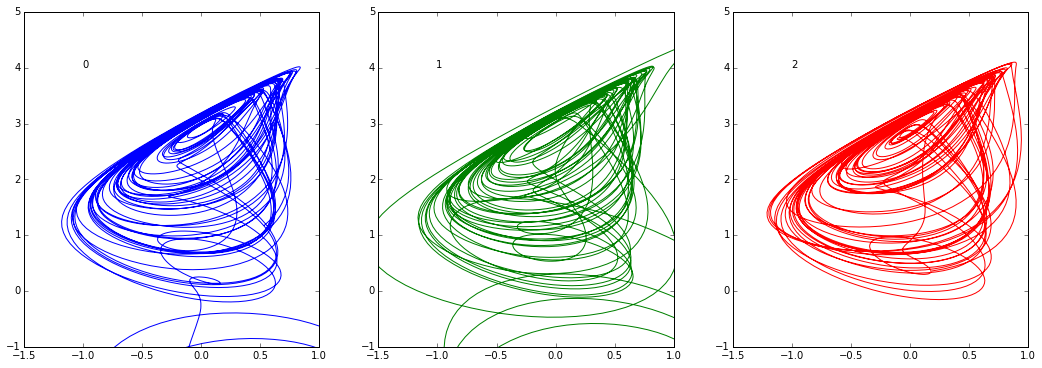

In [5]:
Nosc=3

fig2=py.figure(figsize=(6*Nosc,6))
cols=["blue","green","red"]

for i in range(Nosc):
    c1=2*i+2
    c2=2*i+1
    subnum="1{}{}".format(Nosc,i+1)
    ax2=fig2.add_subplot(subnum)
    ax2.text(-1,4,i)
    ax2.plot(d2[c1],d2[c2],color=cols[i])
    ax2.axis([-1.5,1.0,-1,5])
py.show()

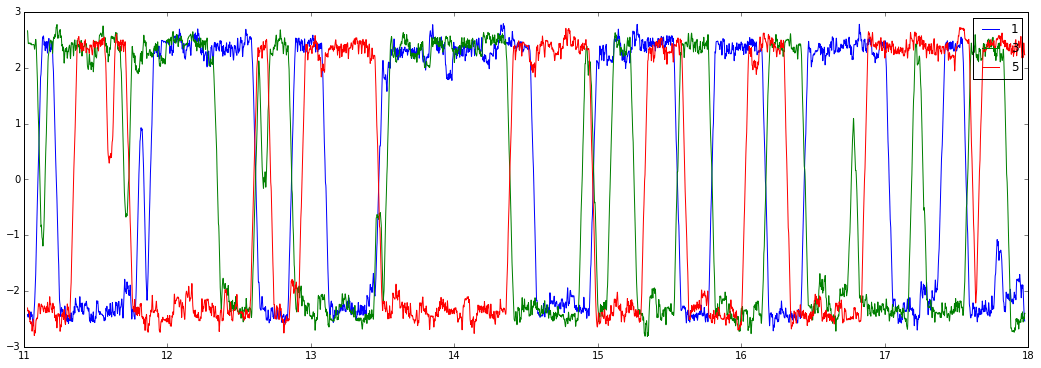

In [70]:
def avSmooth(x,avLen):
    m=zeros(len(x)-avLen)
    for i in range(avLen):
        m+=x[i:i-avLen]
    return m/avLen

ts=10000.0 #points/second
stt=11.0
end=18.0

fig1=py.figure(figsize=(18,6))
ax1=fig1.add_subplot(111)
d2=d1[:,stt*ts:end*ts]

avNum=500

for i in range(3):
    chan=2*i+1
    xs=avSmooth(d2[0],avNum)
    ys=avSmooth(d2[chan],avNum)
    ax1.plot(xs, ys, "-", label=chan)
ax1.legend()
py.savefig('examplesmoothed.png')
py.show()

In [73]:
xs=[]
ys=[]
for i in range(3):
    chan=2*i+1
    xs.append(d1[chan])
    ys.append(avSmooth(d1[chan],avNum))

savetxt("dataorig.txt",transpose(xs))
savetxt("datasmooth{}.txt".format(avNum),transpose(ys))